# Find Links on Pages

In [1]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

options = Options()
options.headless = True
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

In [3]:
url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
b.get(url)

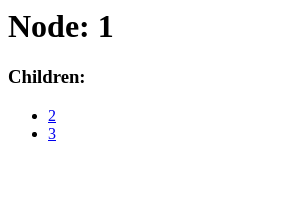

In [11]:
from IPython.display import Image, display
b.set_window_size(300, 200)

def show_screen():
    b.save_screenshot("temp.png")
    display(Image("temp.png"))
show_screen()

In [22]:
def get_children(url):
    b.get(url)
    children = []
    for el in b.find_elements("tag name", "a"):
        children.append(el.get_attribute("href"))
    return children
get_children("https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html")

['https://tyler.caraza-harter.com/cs320/crawl/practice1/4.html']

# Breadth First Search

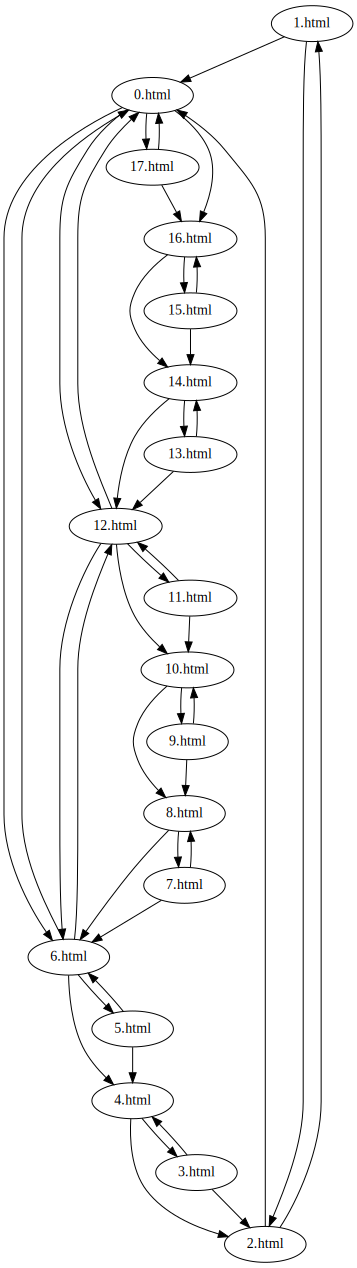

In [35]:
from collections import deque
from graphviz import Digraph

start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice7/1.html"
gv = Digraph()

todo_queue = deque([start_url])
added = {start_url}
# no end url (not looking for a path, just discovering nodes on a site)

while len(todo_queue) > 0: # while there is work
    # 1. do the work
    curr_node = todo_queue.popleft()
    gv.node(curr_node.split("/")[-1])
    children = get_children(curr_node)
    #show_screen()
    
    # 2. record any newly discovered work
    for child in children:
        gv.edge(curr_node.split("/")[-1], child.split("/")[-1])
        
        if not (child in added):
            todo_queue.append(child)
            added.add(child)
            
    #print("TODO:", todo_queue)
gv